In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

Description for features from kaggle:  
sex (1 = male; 0 = female)  
cp - chest pain type  
trestbps - resting blood pressure (in mm Hg on admission to the hospital)  
chol - serum cholestoral in mg/dl  
fbs -(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
restecg - resting electrocardiographic results  
thalach - maximum heart rate achieved  
exang - exercise induced angina (1 = yes; 0 = no)  
oldpeak - ST depression induced by exercise relative to rest  
slope - the slope of the peak exercise ST segment  
ca - number of major vessels (0-3) colored by flourosopy  
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect  
target - 1 or 0 (1 - heart desease)  

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking correlations between non-nominative features:

In [4]:
labels = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

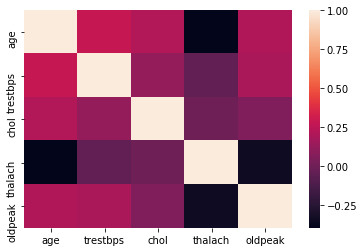

In [5]:
corr_matrix = df[labels].corr()
sns.heatmap(corr_matrix)

In [6]:
X, Y = df.drop(['target'], axis=1), df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(Y), test_size=0.3,
random_state=21)

Using DecisionTreeClassifier for heart desiase forecasting 

In [8]:
tree = DecisionTreeClassifier(max_depth=5, random_state=15)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred) # test accuracy with manual selected manually parametrs

0.8131868131868132

In [9]:
tree_params = {'max_depth': range(1,11),
'max_features': range(1,13)}

In [10]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1, iid='False',
verbose=True) # use cross-validation to found optimal parametrs for classifier

In [11]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best'),
       fit_params=None, iid='False', n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(1, 13)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [12]:
tree_grid.best_params_

{'max_depth': 3, 'max_features': 8}

In [13]:
tree_grid.best_score_ # train accuracy

0.8207547169811321

In [14]:
accuracy_score(y_test, tree_grid.predict(X_test)) # test accuracy

0.7692307692307693

Decision tree visualization

In [15]:
from sklearn.tree import export_graphviz
export_graphviz(tree, feature_names=list(df.drop(['target'], axis=1)), 
out_file='./tree.dot', filled=True)
!dot -Tpng './tree.dot' -o './tree.png'